In [43]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Define the start and end dates
start_date = dt.datetime(1950, 1, 1)
end_date = dt.datetime.now()

In [45]:
# Retrieve the data
treasury_2yr_yields = pdr.DataReader('DGS2', 'fred', start_date, end_date)
fed_funds_target_range = pdr.DataReader('DFEDTARU', 'fred', start_date, end_date)

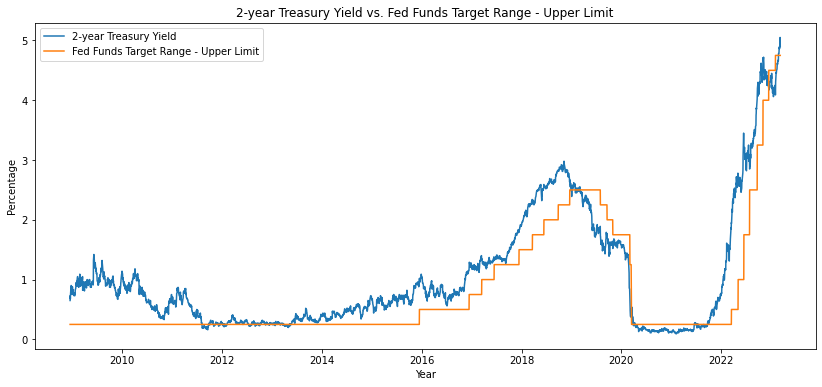

In [46]:
# Combine the data into one DataFrame
data = pd.concat([treasury_2yr_yields, fed_funds_target_range], axis=1)
data = data.dropna()

# Plot the data
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(data.index, data['DGS2'], label='2-year Treasury Yield')
ax.plot(data.index, data['DFEDTARU'], label='Fed Funds Target Range - Upper Limit')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('2-year Treasury Yield vs. Fed Funds Target Range - Upper Limit')
ax.legend()
plt.show()

In [36]:
correlation = data['DGS2'].corr(data['DFEDTARU'])
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: 0.91


In [37]:
from sklearn.linear_model import LinearRegression

X = data[['DGS2']]
y = data['DFEDTARU']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

Slope: 0.85
Intercept: -0.12
